Neste exercício, vamos seguir usando o dataset MNIST, assim como nas aulas:

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"].values, mnist["target"].astype(float)

O __objetivo__ aqui será construir um algoritmo que faça a __predição se um dígito é par ou ímpar.__

Para isso, faça um tratamento inicial na variável target.

Use a __AUC__ como métrica de performance.

Teste diferentes versões do KNN-Classifier, bem como a regressão logística.

Use a __metodologia de validação cruzada__, implementando manualmente a AUC, conforme feito nas aulas.

Plote as __curvas ROC__ dos algoritmos.

### Importando as Bibliotecas necessárias

In [ ]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
X.shape, y.shape # Observando o tamanho do conjunto de dados

((70000, 784), (70000,))

In [ ]:
Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:] # Separando os dados em treino e teste

In [ ]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((55000, 784), (15000, 784), (55000,), (15000,))

In [ ]:
# Criando a condição para separar os dados em par e impar

ytrain = np.where(ytrain % 2 == 0, 1, 0)
ytest = np.where(ytest % 2 == 0, 1, 0)

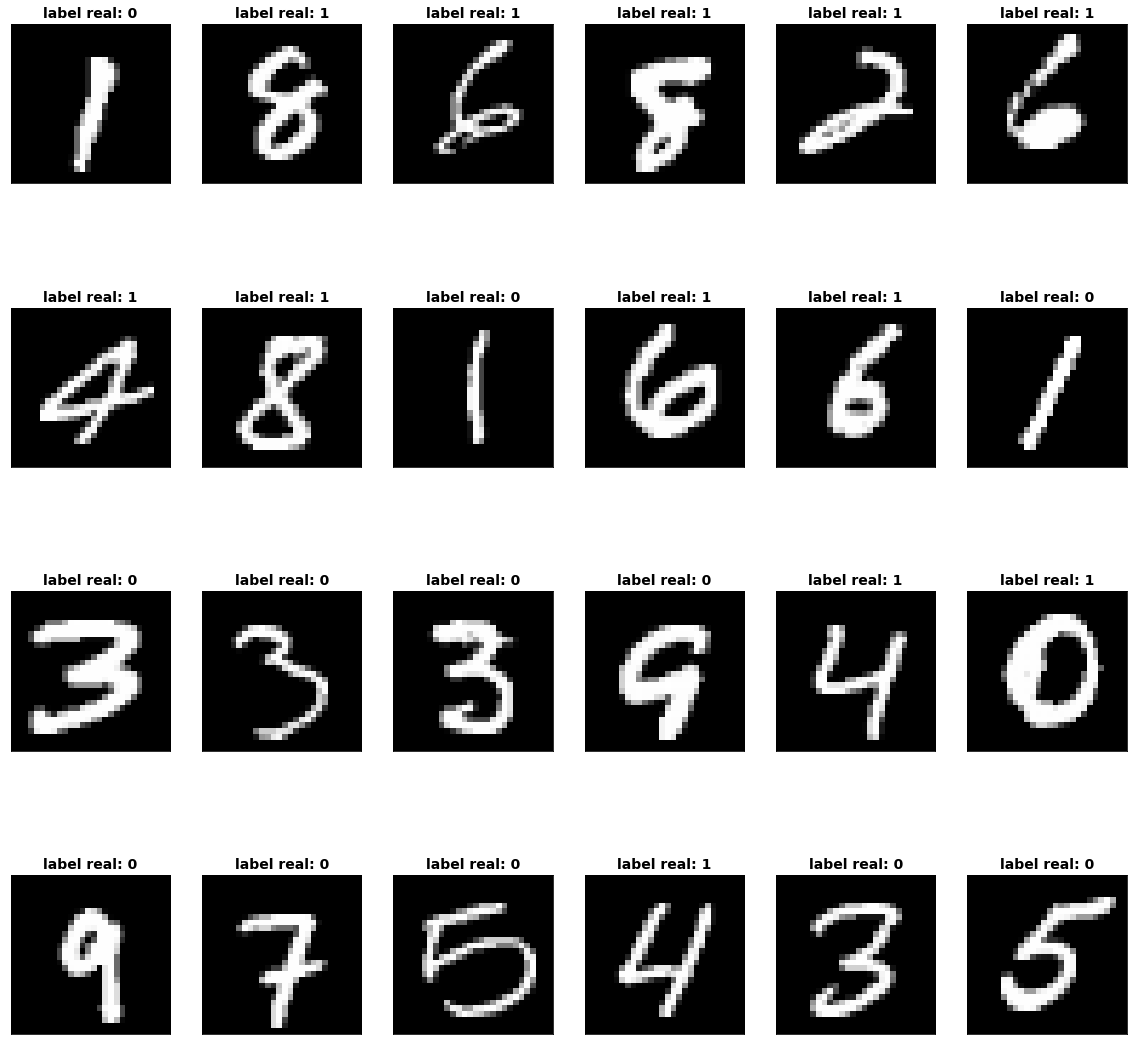

In [ ]:
random_idx = np.random.randint(0,Xtrain.shape[0], size = 24) #Gerando 24 numeros aleatorios com o valor máximo sendo o numero de linhas do dataset

plt.figure(figsize=[20,20]) # Definindo o tamanho do dateset
for i in range(len(random_idx)): # Realizando uma iteração, dentro do numero de iterações relizadas(24)
    idx_i = random_idx[i] # Definindo a iteração sendo que idx_i passa a ser o numero definido no random_idx e atualizado a cada loop [i]
    xval = Xtrain[idx_i, :].reshape(28,28) # xval passa a linha do X que foi gerada no random_idx que reordena as colunas com o metodo reshape(28,28)
    yval = ytrain[idx_i] # yval passa a ser a mesma linha mas com o valor de y
    plt.subplot(4,6,i+1) # O método subplot vai definir a organização das plotagens sendo 4 linhas, 6 colunas
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("label real: "+str(yval), fontsize = 14, fontweight = 'bold')
plt.show()

In [ ]:
print('Percentual da classe par: ',(ytrain.sum() / ytrain.size) * 100, '%')
print('Percentual da classe impar: ',((ytrain.size-ytrain.sum()) / ytrain.size) * 100, '%')

Percentual da classe par:  49.154545454545456 %
Percentual da classe impar:  50.84545454545455 %


In [ ]:
from sklearn.linear_model import LogisticRegression
import time

In [ ]:
t0 = time.time()
#fitando os dados
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

tempo (em segundos) para execução:  8.92


In [ ]:
print(logreg.intercept_)
print(logreg.coef_)

[-0.00096028]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.37045221e-05  3.27103706e-05  3.00702379e-06  1.25292658e-07
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.20833857e-07  9.93018690e-07  2.57961814e-05  4.77974316e-05
   7.04034820e-05  4.93753626e-05  8.29765414e-05  1.20424654e-04
   2.05525411e-04  2.88618844e-04  1.04429436e-06 -1.51574492e-04
   2.26522065e-04  1.58010086e-04  6.54366878e-05  7.41711245e-05
   7.15029484e-05  3.05181227e-05  5.61725086e-06  3.22643631e-06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.20811040e-07  8.67179461e

In [ ]:
logreg.predict_proba(Xtrain)

array([[0.99822151, 0.00177849],
       [0.07069139, 0.92930861],
       [0.22018981, 0.77981019],
       ...,
       [0.00949751, 0.99050249],
       [0.31642616, 0.68357384],
       [0.01305645, 0.98694355]])

In [ ]:
# Realizando a acuracia manualmente
predicoes = logreg.predict(Xtrain)

qtd_acertos = (predicoes == ytrain).sum()
total_inst = ytrain.size

acuracia_sgd = qtd_acertos / total_inst
print("acurácia - em dados de treino - da regressão logística foi de : ", acuracia_sgd)

acurácia - em dados de treino - da regressão logística foi de :  0.8989454545454545


In [ ]:
ytrain.shape

(55000,)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Realizando a implementação pela biblioteca
accuracy_score(y_true = ytrain, y_pred = logreg.predict(Xtrain))

0.8989454545454545

## Implementação da Validação Cruzada Manual

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = 5)

In [ ]:
t0 = time.time()


classif__ = LogisticRegression() #Modelo
lista_acuracia_treino = [] #Valores de acuracia em treino
lista_acuracia_validacao = [] #Valores de acuracia em validação

for train_index, val_index in kf.split(Xtrain, ytrain):

    Xtrain_folds = Xtrain[train_index]
    ytrain_folds = ytrain[train_index]
    Xval_fold = Xtrain[val_index]
    yval_fold = ytrain[val_index]

    classif__.fit(Xtrain_folds, ytrain_folds)

    pred_treino = classif__.predict(Xtrain_folds)
    pred_validacao = classif__.predict(Xval_fold)

    lista_acuracia_treino.append(accuracy_score(y_pred = pred_treino, y_true = ytrain_folds))
    lista_acuracia_validacao.append(accuracy_score(y_pred = pred_validacao, y_true = yval_fold))


print("acurácias em treino: \n", lista_acuracia_treino, " \n| média: ", np.mean(lista_acuracia_treino))
print()
print("acurácias em validação: \n", lista_acuracia_validacao, " \n| média: ", np.mean(lista_acuracia_validacao))


t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

KeyboardInterrupt: ignored

## Implementação da validação cruzada pela biblioteca

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true = ytrain, y_pred = logreg.predict(Xtrain))

array([[25110,  2855],
       [ 2703, 24332]])

In [ ]:
cm1 = confusion_matrix(y_true = ytrain, y_pred = logreg.predict(Xtrain))
cm1

array([[25110,  2855],
       [ 2703, 24332]])

#### Utilização das Metricas de Performance como:

- Precision
- Recall
- F1_score

In [ ]:
#Recall:

cm1[1,1] / cm1[1, :].sum()

0.9000184945441095

In [ ]:
#Precision:

cm1[1,1] / cm1[:, 1].sum()

0.8949865744657373

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print("LogReg:")
print('Recall: ', recall_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))
print('Precison: ', precision_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))

LogReg:
Recall:  0.9000184945441095
Precison:  0.8949865744657373


In [ ]:
from sklearn.metrics import f1_score

F1 Score - reg. logística:  0.8974954815388587


In [ ]:
def validacao_cruzada(classificador, #Modelo
                      X,
                      y,
                      metrica,
                      num_folds,
                      print_info = False,
                      nome_metrica = None):

    lista_metrica_treino = []
    lista_metrica_validacao = []

    kf = KFold(n_splits = num_folds) #Numero que vai acontecer as dobras(no minimo 2)
    for train_index, val_index in kf.split(X, y):

        Xtrain_folds = X[train_index]
        ytrain_folds = y[train_index]
        Xval_fold = X[val_index]
        yval_fold = y[val_index]

        print(Xval_fold.shape)
        print(yval_fold.shape)

        classificador.fit(Xtrain_folds, ytrain_folds)

        pred_treino = classificador.predict(Xtrain_folds)
        pred_validacao = classificador.predict(Xval_fold)

        lista_metrica_treino.append(metrica(y_pred = pred_treino, y_true = ytrain_folds))
        lista_metrica_validacao.append(metrica(y_pred = pred_validacao, y_true = yval_fold))

    if print_info:
        print("Métrica: " + nome_metrica)
        print('média treino:', np.mean(lista_metrica_treino))
        print('média validação:', np.mean(lista_metrica_validacao))

    return lista_metrica_treino, lista_metrica_validacao

In [ ]:
t0 = time.time()

for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
    l1, l2 = validacao_cruzada(classificador = LogisticRegression(),
                 X = Xtrain,
                 y = ytrain,
                 metrica = metrica,
                 num_folds = 5,
                 print_info = True,
                 nome_metrica = nome_metrica)
    print()

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

(11000, 784)
(11000,)
(11000, 784)
(11000,)
(11000, 784)
(11000,)
(11000, 784)
(11000,)
(11000, 784)
(11000,)
Métrica: Precision
média treino: 0.8950839628527107
média validação: 0.8888981955992851

(11000, 784)
(11000,)
(11000, 784)
(11000,)
(11000, 784)
(11000,)
(11000, 784)
(11000,)
(11000, 784)
(11000,)
Métrica: Recall
média treino: 0.9012725410432367
média validação: 0.8957292563612789

(11000, 784)
(11000,)
(11000, 784)
(11000,)
(11000, 784)
(11000,)
(11000, 784)
(11000,)
(11000, 784)
(11000,)
Métrica: F1
média treino: 0.8981670630704246
média validação: 0.89229393232906

tempo (em segundos) para execução:  110.49


## Analisando o melhor limiar

In [ ]:
prob_class_1 = logreg.predict_proba(Xtrain)[:, 1]

In [ ]:
np.where(prob_class_1 > 0.5, 1, 0)

In [ ]:
limiares = np.linspace(0.05,0.95,19)

In [ ]:
precision_list = [] #Lista Precision
recall_list = [] #Lista Recall

for t in limiares:

    pred_t = np.where(prob_class_1 > t, 1, 0) # Onde a prob_class_1 for maior que t(que são os limiares definidos acima) se for verdade 1 caso contrario 0

    precision_t = precision_score(y_true = ytrain, y_pred = pred_t) # função precision sendo que o y segue sendo ytrain mas no y_pred passa a valer a condição acima (pred_t)
    recall_t = recall_score(y_true = ytrain, y_pred = pred_t) # função recall sendo que o y segue sendo ytrain mas no y_pred passa a valer a condição acima (pred_t)

    precision_list.append(precision_t) # Os valore são armazenados nas listas
    recall_list.append(recall_t)


plt.figure(figsize=[20,10])
plt.plot(range(len(limiares)), precision_list, c = 'red', label = 'Precision', lw = 2) # plotando linha com os valores da precision_list
plt.plot(range(len(limiares)), recall_list, c = 'blue', label = 'Recall', lw = 2) # plotando linha com os valores da recall_list
plt.xticks(range(len(limiares)), limiares.round(2), fontweight = 'bold', fontsize = 14)
plt.yticks(fontweight = 'bold', fontsize = 14)
plt.legend(fontsize = 20, bbox_to_anchor = [1,1])
plt.grid()
plt.xlabel("Limiar", fontsize = 20, fontweight = 'bold')
plt.ylabel("Métrica", fontsize = 20, fontweight = 'bold')
plt.title("TRADE OFF ~ PRECISION vs RECALL", fontsize = 20, fontweight = 'bold')
plt.show()

- Visualizamos que o valor de 0.5 parece ser um bom limiar visto que tanto a precision quanto a recall estão com um valor alto neste ponto

In [ ]:
for t in np.arange(0.1, 1.0, 0.1):
    print('limiar: ', np.round(float(t), 2))
    print("confusion matrix:" )
    preds = np.where(prob_class_1 > t, 1, 0)
    print(confusion_matrix(y_pred = preds, y_true = ytrain))
    print('======================= \n')

In [ ]:
#adaptação da função validacao_cruzada
def validacao_cruzada(classificador,
                      X,
                      y,
                      metrica,
                      num_folds,
                      limiar = 0.5,
                      print_info = False,
                      nome_metrica = None):

    lista_metrica_treino = [] # lista para armazenar os valores de treino
    lista_metrica_validacao = [] # lista para armazenar os valores de validação
    kf = KFold(n_splits = num_folds) # Kf metodo para realizar a validação cruzada e o num_folds será definido na chamada da função
    for train_index, val_index in kf.split(X, y):
        Xtrain_folds = X[train_index] # Xtrain será o valor de cada iteração no X
        ytrain_folds = y[train_index] # ytrain será o valor de cada iteração no y
        Xval_fold = X[val_index]
        yval_fold = y[val_index]
        classificador.fit(Xtrain_folds, ytrain_folds)

        #alteração nesta parte! agora, primeiro calculamos a probabilidade e na sequência usamos o valor do limiar
        prob_class1_treino = classificador.predict_proba(Xtrain_folds)[:,1]
        prob_class1_validacao = classificador.predict_proba(Xval_fold)[:,1]
        pred_treino = np.where(prob_class1_treino > limiar, 1, 0)
        pred_validacao = np.where(prob_class1_validacao > limiar, 1, 0)

        lista_metrica_treino.append(metrica(y_pred = pred_treino, y_true = ytrain_folds))
        lista_metrica_validacao.append(metrica(y_pred = pred_validacao, y_true = yval_fold))
    if print_info:
        print("Métrica: " + nome_metrica)
        print('média treino:', np.mean(lista_metrica_treino))
        print('média validação:', np.mean(lista_metrica_validacao))
    return lista_metrica_treino, lista_metrica_validacao

In [ ]:
print("Testando o limiar 0.15:")
lt, lv = validacao_cruzada(classificador = LogisticRegression(),
                           X = Xtrain,
                           y = ytrain,
                           metrica = f1_score,
                           num_folds = 5,
                           limiar = 0.8,
                           print_info = True,
                           nome_metrica = 'F1')

In [ ]:
import time

lista_media_metrica_treino = []
lista_media_metrica_validacao = []

t0 = time.time()

for t in limiares:

    lt, lv = validacao_cruzada(classificador = LogisticRegression(),
                               X = Xtrain,
                               y = ytrain,
                               metrica = f1_score,
                               num_folds = 5,
                               limiar = t)

    lista_media_metrica_treino.append(np.mean(lt))
    lista_media_metrica_validacao.append(np.mean(lv))

plt.figure(figsize=[8,6])
plt.plot(range(len(limiares)), lista_media_metrica_treino, c = 'red', label = 'F1 médio - TREINO', lw = 2)
plt.plot(range(len(limiares)), lista_media_metrica_validacao, c = 'blue', label = 'F1 médio - VALIDAÇÃO', lw = 2)
plt.xticks(range(len(limiares)), limiares.round(2))
plt.legend(fontsize = 14, bbox_to_anchor = [1,1])
plt.grid()
plt.xlabel("Limiar", fontsize = 14, fontweight = 'bold')
plt.ylabel("Valor", fontsize = 14, fontweight = 'bold')
plt.title("Dispersão do F1 (cross-val.) por limiar - Reg. Logística", fontsize = 16, fontweight = 'bold')
plt.show()

t1 = time.time()
print(t1-t0)

- O melhor limiar é o 0.5

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])

#fpr = false positive rate = taxa de falso positivos
#tpr = true positive rate = taxa de verdadeiro positivos
#thresholds = limiares usados

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid()
plt.show()

In [ ]:
print("Testando o limiar 0.5:")
lt, lv = validacao_cruzada(classificador = LogisticRegression(),
                           X = Xtest,
                           y = ytest,
                           metrica = f1_score,
                           num_folds = 5,
                           limiar = 0.5,
                           print_info = True,
                           nome_metrica = 'F1')

In [ ]:
#A curva ROC demonstra que realmente o melhor limiar é o 0,5

## Testando outros Modelos

In [ ]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
ytrain = np.where(ytrain % 2 == 0, 1, 0)
ytest = np.where(ytest % 2 == 0, 1, 0)

In [ ]:
for i in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors = i).fit(Xtrain, ytrain)
    Acuracia = accuracy_score(y_true = ytrain, y_pred = knn.predict(Xtrain))

    print("K Vizinhos", i ,"Acuracia",Acuracia)

- modelo com 1 vizinho teve nota 1 que pode ser overfitting
- todos os  outros modelos teve uma acurácia muito alta

In [ ]:
#t0 = time.time()


#for i in range(1,21,2):
#  knn = KNeighborsClassifier(n_neighbors = i).fit(Xtrain, ytrain)
#  print("K-vizinho", i)
#  print('Recall: ', recall_score(y_true = ytrain, y_pred = knn.predict(Xtrain)))
#  print('Precison: ', precision_score(y_true = ytrain, y_pred = knn.predict(Xtrain)))
#  print('F1 Score: ', f1_score(y_true = ytrain, y_pred = knn.predict(Xtrain)))
#  print('****************** \n')
#
#t1 = time.time()
#print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

## Esse bloco de código não foi possivel de ser realizado, muito pesado para ser gerado

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(Xtrain, ytrain)
print("K-vizinho 5", )
print('Recall: ', recall_score(y_true = ytrain, y_pred = knn.predict(Xtrain)))
print('Precison: ', precision_score(y_true = ytrain, y_pred = knn.predict(Xtrain)))
print('F1 Score: ', f1_score(y_true = ytrain, y_pred = knn.predict(Xtrain)))
print('****************** \n')

- O modelo com 1 vizinho continua com valor 1 e os demais continuaram com metricas bem altas
- Próximo método será obter as mesmas metricas depois de realizar a validação cruzada

In [ ]:
t0 = time.time()


for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
  print("K-vizinho 5")
  l1, l2 = validacao_cruzada(classificador = KNeighborsClassifier(n_neighbors = 5),
                X = Xtrain,
                y = ytrain,
                metrica = metrica,
                num_folds = 5,
                print_info = True,
                nome_metrica = nome_metrica)

  print('==================== \n')

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

- O modelo knn com 5 vizinhos teve valoresaltos nas metricas recall, precision, f1

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = knn.predict_proba(Xtest)[:, 1])

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') #
plt.grid()
plt.show()

- Modelo knn com 5 vizinhos teve um limiar de 0.5